In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
us_covid = "Resource/statistic_id1134709_us-consumers-online-shopping-use-before-and-after-covid-19-2020-by-category.xlsx"

In [4]:
us_covid_df = pd.read_excel(us_covid, sheet_name="Data")

In [5]:
us_covid_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,U.S. consumers online shopping use before and ...,NaN,NaN,NaN
2,NaN,Share of consumers in the United States using ...,NaN,NaN,NaN
3,NaN,NaN,Pre-COVID-19,Expected growth after COVID-19,NaN
4,NaN,Over-the-counter medicine,21,14,in %
5,NaN,Household supplies,24,11,in %
6,NaN,Groceries,26,11,in %
7,NaN,Snacks,25,9,in %
8,NaN,Food takeout & delivery,39,14,in %
9,NaN,Fitness & wellness,41,14,in %


In [6]:
dropcol_df = us_covid_df.drop(["Unnamed: 0","Unnamed: 4"], axis=1)
dropcol_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN
1,U.S. consumers online shopping use before and ...,NaN,NaN
2,Share of consumers in the United States using ...,NaN,NaN
3,NaN,Pre-COVID-19,Expected growth after COVID-19
4,Over-the-counter medicine,21,14


In [7]:
droprow_df = dropcol_df.drop(index=[0,1,2,3], axis=0)
droprow_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3
4,Over-the-counter medicine,21,14
5,Household supplies,24,11
6,Groceries,26,11
7,Snacks,25,9
8,Food takeout & delivery,39,14


In [8]:
rename_df = droprow_df.rename(columns={"Unnamed: 1": "Category",
                                      "Unnamed: 2": "Pre-Covid-19 (%)",
                                      "Unnamed: 3": "Expected Growth after Covid-19 (%)"})
rename_df.head()

,Category,Pre-Covid-19 (%),Expected Growth after Covid-19 (%)
4,Over-the-counter medicine,21,14
5,Household supplies,24,11
6,Groceries,26,11
7,Snacks,25,9
8,Food takeout & delivery,39,14


In [9]:
#average pre covid
#average post covid

In [10]:
category = rename_df["Category"]
precovid = rename_df["Pre-Covid-19 (%)"]
postcovid = rename_df["Expected Growth after Covid-19 (%)"]

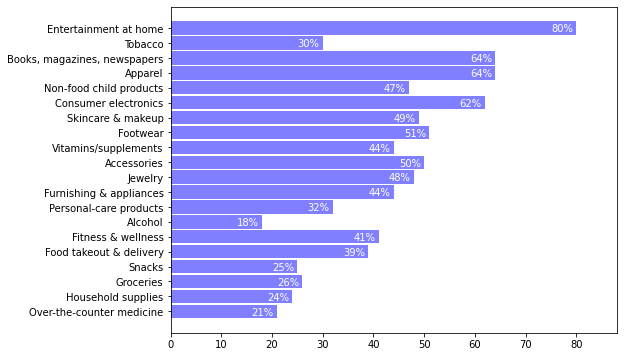

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
trace = ax.barh(category, precovid, color="b", height = 0.9, alpha=.50, align="center")
ax.set_xlim(0, precovid.max()*1.1)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(int(width)) + "%", (width-5, bottom+0.2), color = "white")

plt.show()

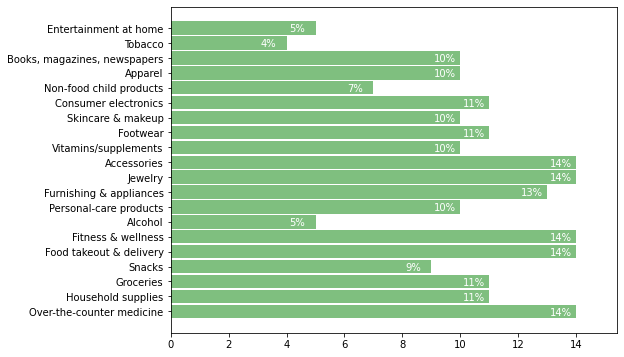

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
trace = ax.barh(category, postcovid, color="g", height = 0.9, alpha=.50, align="center")
ax.set_xlim(0, postcovid.max()*1.1)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(int(width)) + "%", (width-0.9, bottom+0.2), color = "white")

plt.show()

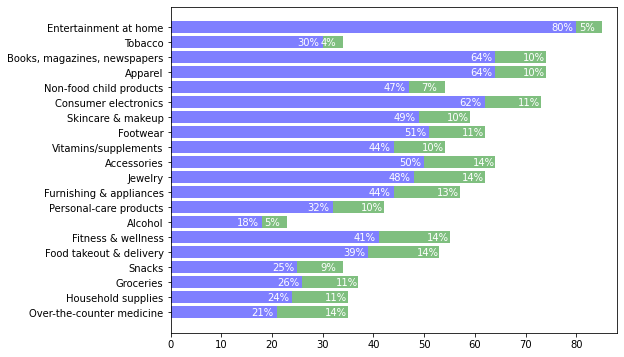

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
trace = ax.barh(category, precovid, color="b", alpha=.50, align="center")
trace = ax.barh(category, postcovid, left=precovid, color="g", alpha=.50, align="center")

ax.set_xlim(0, precovid.max()*1.1)
cnt = 0
x_cor_list = []

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if cnt < 20:
        ax.annotate(str(int(width)) + "%", (width-5, bottom+0.2), color = "white")
        x_cor_list.append(width)
    else:
        ax.annotate(str(int(width)) + "%", (width+x_cor_list[cnt-20]-4.5, bottom+0.2), color = "white")
    
    cnt += 1

#trace = ax.barh(category, postcovid, left=precovid, color="g", alpha=.50, align="center")

#for p in ax.patches:
#    left, bottom, width, height = p.get_bbox().bounds
#    ax.annotate(str(int(width)) + "%", (width-0.9, bottom+0.2), color = "white")
    
plt.show()

In [ ]:
#ad space between category
#add name to x and y axis
#add legend